In [1]:
import json
import folium
import polyline
from folium import plugins
import datetime

C:\Users\wangt\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\wangt\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [18]:
import base64

s = "gHhoe3I1+o8jErAJUoWK2A=="
decoded = base64.b64decode(s)
print(decoded)

b'\x80xh{r5\xfa\x8f#\x12\xb0\tR\x85\x8a\xd8'


In [15]:
import base64
import zlib
import gzip
import struct

# 你的 Base64 数据
base64_strings = [
    "YWTjhf3DXWJbMQ28eYc3X7NE63U83xZW34VvBOIfLbBincRjVgGYQw5IWLf/0NNtJ2yZGXr8zAOdW5eAwLDdJ0l7plb1FCplxc88bqqMl0vPPsiWhjQMkkp8GSkEWvoCgWEyShefOHROC0Hg3u4Fp/RUyD94TM+dHyKjMQxB2v7Bfuq1kXnsHPI+oqjETiVytN8eOloDwAyFPCXtB6yeZab7/1+S8kT5yNo5R+jJ6Ub8ns4o38sVKpthKDW0VJgAe9ze7tOlIweLSMKXfoakgL/L2Xum/I25Zm07TqIc3RPFB8tiw9o3DTsYhO5k9IIiZLQxctcO1ByWBAh2n2rzqis1DEBTxUiICfwZpryJVdQJjaddy6OiotCIwzUz1Mjz",
    "YWTjhf3DXWJbMQ28eYc3X/A0cefDxMT4q/WE7D/AWUIgtmG1f0T9Bkkj1H2trjLUt3ZjovfZfyfdKOOXZLORE4beoXlX4zc5H5iFR+gK/4d4OBJrvopzB2ySk+GT1HMIRmLHWmDY5BWRJ9TMR5c45Vd660gjcg68KhI+kOdWJe8pBVXAoAmEe8R9sU2q/iN9JGrXcHwbwYhOKouOdOqkDGnLVIl/FUF0uKShSGvyKbZ/TnBh5ubBJ0HhitU59xPWg4VAoykzk72fzCCjukfx90Omg/kkqJhlA8Mg+oanMIe/kcQa3ZD38ThzxQn2Ghb4a0jZdU7Y7EgPbWX4ZT/Q1qxhWP5Fl2hpPm0bkGPpMUADKcKyn9VJi1puHgtqC2/68c+rjJsKEV+2O80mswkFjOpRxmwxO3HWHNUglZJHVkXfHS3YhbPU0vigbDNEjF05iUMD6jKSigD+Ydt3Kj9Gum8FNdrLnd1h74NrtbtzMGSa3shkMHCPf/8OGJlmtYjArE/Uk8NlATjtxutni3FK5VsT2Z3Qf4gl3r/RWSvvH/wdxA7YBsBhRPgoNBIGThz1g44NoAOzp/v2qnxQUleB+vROG4WgmJF2EQ1Z/Q51SfYadllQrnyoXnDWrnU1OSLwwcK9IQVbgmaAhNloZ+RoljWcih3gH5aI3bI8tELCg//4KbQY/tJbuEqGFg0sNi5u6qJr15zrRxFZUyRsdUaBJCGGR+duD2ZIt5EtnQLkpwzBvAdNIgcUnRb5DTKMH8KmjtfnzyjQhT++AYYy7jSOC+XusVe1irrOVjlM+JXRMiXC4AST0BWAMzCVkwvTo86NNml0eF8tukaOTLe/H7wsItcMQBvk2A01cFXoyFaTTRY="
]

def decode_and_try_decompress(b64_string):
    # Step 1: Base64 解码
    data = base64.b64decode(b64_string)
    print(f"解码后的字节长度: {len(data)}")
    
    # Step 2: 尝试 gzip 解压
    try:
        decompressed = gzip.decompress(data)
        print("成功 gzip 解压")
        data = decompressed
    except:
        # Step 3: 尝试 zlib 解压
        try:
            decompressed = zlib.decompress(data)
            print("成功 zlib 解压")
            data = decompressed
        except:
            print("无法解压，使用原始字节")
    
    return data

def try_parse_coords(data):
    coords = []
    # 尝试把字节按 float/double 解析为坐标
    # 先按 float32（4字节）尝试
    if len(data) >= 8:
        try:
            for i in range(0, len(data)-7, 8):
                lat, lng = struct.unpack('<ff', data[i:i+8])
                if -90 <= lat <= 90 and -180 <= lng <= 180:
                    coords.append((lat, lng))
        except:
            pass
    return coords

all_coords = []

for i, b64 in enumerate(base64_strings):
    print(f"\n=== Base64 段 {i+1} ===")
    raw_data = decode_and_try_decompress(b64)
    coords = try_parse_coords(raw_data)
    if coords:
        print(f"解析出 {len(coords)} 个可能坐标点（前10个）：")
        print(coords[:10])
        all_coords.extend(coords)
    else:
        print("无法直接解析出坐标，可能是自定义二进制或加密格式")

print(f"\n总共解析到 {len(all_coords)} 个坐标点")



=== Base64 段 1 ===
解码后的字节长度: 288
无法解压，使用原始字节
解析出 12 个可能坐标点（前10个）：
[(2.8155785576231392e-36, -6.298234156432159e-10), (1.5863511598842363e-23, 1.2048008154350962e-36), (-1.3900024572740483e-38, 6.153145484452671e-15), (-3.235138047314967e-25, -4.424095082745724e-28), (3.408062813079274e-14, 3.6785864898095526e-37), (1.5650925636291504, -5.487151060984526e-21), (-1.7471248838774045e-06, 1.5648594144497333e-21), (0.0006060556042939425, 2.9584301094093954e-31), (2.2939542789184725e-14, 1.3304590448012105e-13), (6.272691166486766e-07, 1.3989381171915083e-38)]

=== Base64 段 2 ===
解码后的字节长度: 656
无法解压，使用原始字节
解析出 21 个可能坐标点（前10个）：
[(-8.40840584714897e-07, 9.526866860664305e-35), (-3.0827083759266436e-18, 3.550651788848647e-15), (-1.4679846518156996e-24, 3.678003881578703e-27), (-3.43068835027598e-30, 2.540930721223324e-31), (-1.0436613062017292e-17, -0.07187492400407791), (-3.0652517197352853e-29, 2.779869794845581), (-2.2603222404882217e-08, -3.8871902531091987e-32), (1.424091718504948e-15, -1.


=== 处理 Z99 ===
未压缩或无法解压，使用原始字节
解析到 12 个坐标点（前10个）：
[(2.8155785576231392e-36, -6.298234156432159e-10), (1.5863511598842363e-23, 1.2048008154350962e-36), (-1.3900024572740483e-38, 6.153145484452671e-15), (-3.235138047314967e-25, -4.424095082745724e-28), (3.408062813079274e-14, 3.6785864898095526e-37), (1.5650925636291504, -5.487151060984526e-21), (-1.7471248838774045e-06, 1.5648594144497333e-21), (0.0006060556042939425, 2.9584301094093954e-31), (2.2939542789184725e-14, 1.3304590448012105e-13), (6.272691166486766e-07, 1.3989381171915083e-38)]

=== 处理 T110 ===
未压缩或无法解压，使用原始字节
解析到 21 个坐标点（前10个）：
[(-8.40840584714897e-07, 9.526866860664305e-35), (-3.0827083759266436e-18, 3.550651788848647e-15), (-1.4679846518156996e-24, 3.678003881578703e-27), (-3.43068835027598e-30, 2.540930721223324e-31), (-1.0436613062017292e-17, -0.07187492400407791), (-3.0652517197352853e-29, 2.779869794845581), (-2.2603222404882217e-08, -3.8871902531091987e-32), (1.424091718504948e-15, -1.0248866056613186e-31), (5.50944

C:\Users\wangt\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36712 (\N{CJK UNIFIED IDEOGRAPH-8F68}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangt\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36857 (\N{CJK UNIFIED IDEOGRAPH-8FF9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangt\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wangt\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


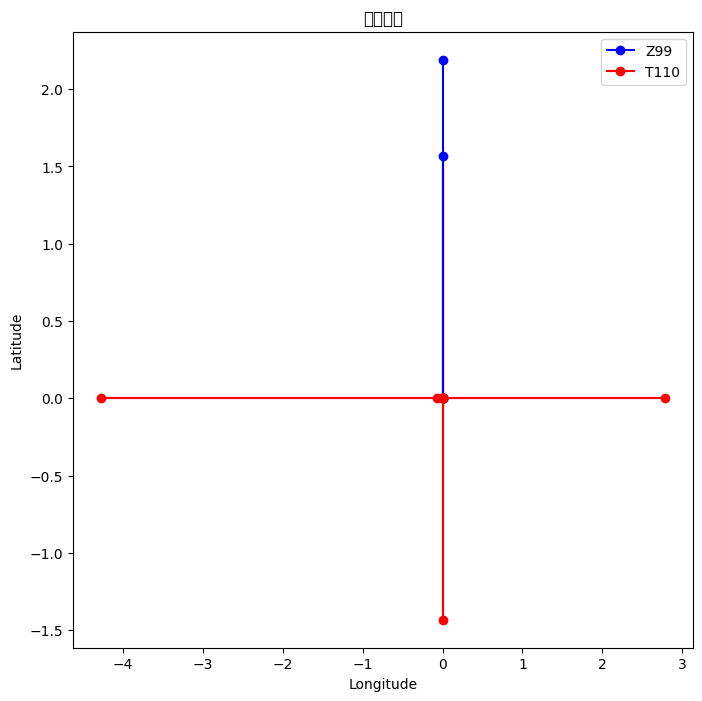

In [17]:
import base64
import zlib
import gzip
import struct
import matplotlib.pyplot as plt

# 两个 Base64 返回值
base64_data = {
    "Z99": "YWTjhf3DXWJbMQ28eYc3X7NE63U83xZW34VvBOIfLbBincRjVgGYQw5IWLf/0NNtJ2yZGXr8zAOdW5eAwLDdJ0l7plb1FCplxc88bqqMl0vPPsiWhjQMkkp8GSkEWvoCgWEyShefOHROC0Hg3u4Fp/RUyD94TM+dHyKjMQxB2v7Bfuq1kXnsHPI+oqjETiVytN8eOloDwAyFPCXtB6yeZab7/1+S8kT5yNo5R+jJ6Ub8ns4o38sVKpthKDW0VJgAe9ze7tOlIweLSMKXfoakgL/L2Xum/I25Zm07TqIc3RPFB8tiw9o3DTsYhO5k9IIiZLQxctcO1ByWBAh2n2rzqis1DEBTxUiICfwZpryJVdQJjaddy6OiotCIwzUz1Mjz",
    "T110": "YWTjhf3DXWJbMQ28eYc3X/A0cefDxMT4q/WE7D/AWUIgtmG1f0T9Bkkj1H2trjLUt3ZjovfZfyfdKOOXZLORE4beoXlX4zc5H5iFR+gK/4d4OBJrvopzB2ySk+GT1HMIRmLHWmDY5BWRJ9TMR5c45Vd660gjcg68KhI+kOdWJe8pBVXAoAmEe8R9sU2q/iN9JGrXcHwbwYhOKouOdOqkDGnLVIl/FUF0uKShSGvyKbZ/TnBh5ubBJ0HhitU59xPWg4VAoykzk72fzCCjukfx90Omg/kkqJhlA8Mg+oanMIe/kcQa3ZD38ThzxQn2Ghb4a0jZdU7Y7EgPbWX4ZT/Q1qxhWP5Fl2hpPm0bkGPpMUADKcKyn9VJi1puHgtqC2/68c+rjJsKEV+2O80mswkFjOpRxmwxO3HWHNUglZJHVkXfHS3YhbPU0vigbDNEjF05iUMD6jKSigD+Ydt3Kj9Gum8FNdrLnd1h74NrtbtzMGSa3shkMHCPf/8OGJlmtYjArE/Uk8NlATjtxutni3FK5VsT2Z3Qf4gl3r/RWSvvH/wdxA7YBsBhRPgoNBIGThz1g44NoAOzp/v2qnxQUleB+vROG4WgmJF2EQ1Z/Q51SfYadllQrnyoXnDWrnU1OSLwwcK9IQVbgmaAhNloZ+RoljWcih3gH5aI3bI8tELCg//4KbQY/tJbuEqGFg0sNi5u6qJr15zrRxFZUyRsdUaBJCGGR+duD2ZIt5EtnQLkpwzBvAdNIgcUnRb5DTKMH8KmjtfnzyjQhT++AYYy7jSOC+XusVe1irrOVjlM+JXRMiXC4AST0BWAMzCVkwvTo86NNml0eF8tukaOTLe/H7wsItcMQBvk2A01cFXoyFaTTRY="
}

def decode_and_decompress(b64_string):
    data = base64.b64decode(b64_string)
    # 尝试 gzip
    try:
        data = gzip.decompress(data)
        print("gzip 解压成功")
    except:
        # 尝试 zlib
        try:
            data = zlib.decompress(data)
            print("zlib 解压成功")
        except:
            print("未压缩或无法解压，使用原始字节")
    return data

def parse_coords(data):
    coords = []
    # 尝试 float32 little endian 两两解析为 lat/lng
    for i in range(0, len(data)-7, 8):
        try:
            lat, lng = struct.unpack('<ff', data[i:i+8])
            if -90 <= lat <= 90 and -180 <= lng <= 180:
                coords.append((lat, lng))
        except:
            continue
    return coords

# 解析所有数据
all_coords = {}
for key, b64 in base64_data.items():
    print(f"\n=== 处理 {key} ===")
    raw = decode_and_decompress(b64)
    coords = parse_coords(raw)
    if coords:
        print(f"解析到 {len(coords)} 个坐标点（前10个）：")
        print(coords[:10])
    else:
        print("无法解析为坐标点")
    all_coords[key] = coords

# 可选：绘制轨迹对比
plt.figure(figsize=(8,8))
colors = {"Z99":"blue","T110":"red"}
for key, coords in all_coords.items():
    if coords:
        lats, lngs = zip(*coords)
        plt.plot(lngs, lats, marker='o', color=colors[key], label=key)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("轨迹对比")
plt.legend()
plt.show()
